# Day 3: Rotation Barriers of 1,2-Fluoro-Ethane

We want to find the rotation barrier of the different conformers of 1,2-fluoro-ethane. Therefore, we calculate the energies for different conformers, which is called conformational screening.
To solve the Schrödinger equation, we will use density functional theory (DFT). As functional, the PBE functional will be chosen. It provides reasonable energies for small organic molecules.

In [1]:
# Import all necessary methods

from ase.visualize import view
from pymolpro import ASEMolpro
from ase.optimize import BFGS
from ase.io import read, write
import numpy as np
import matplotlib.pyplot as plt
from ase.units import kJ,mol

First, create a conformation of the 1,2-fluoro-ethane that you consider to be the most stable and read it in using the program Avogadro, which already is installed on your computer. Save it as xyz file using "export molecule...". Then, read the structure into a molecule object using the read() method.

In [11]:
# read in structure
fluoro_ethane = read("1,2-fluoroethane.xyz")

Perform a geometry optimization using the functional PBE with a def2-SVP basis set and set density_fitting always to 'True'.

In [12]:
# perform geometry optimization
fluoro_ethane.calc = ASEMolpro(ansatz='PBE/def2-SVP', density_fitting=True)
with BFGS(fluoro_ethane, trajectory='fluoro_ethane.traj') as opt:
    opt.run(fmax=0.0001)

      Step     Time          Energy          fmax
BFGS:    0 13:56:36    -7548.794141       29.011279
BFGS:    1 13:56:43    -7554.040538        5.642506
BFGS:    2 13:56:50    -7554.712761        2.856462
BFGS:    3 13:56:57    -7554.990008        1.154479
BFGS:    4 13:57:03    -7555.126054        1.193933
BFGS:    5 13:57:10    -7555.254198        1.734095
BFGS:    6 13:57:17    -7555.595983        2.880228
BFGS:    7 13:57:23    -7555.989484        3.577216
BFGS:    8 13:57:30    -7556.445854        4.154164
BFGS:    9 13:57:37    -7556.881302        3.690175
BFGS:   10 13:57:44    -7557.595656        2.387688
BFGS:   11 13:57:51    -7558.194738        2.432998
BFGS:   12 13:57:58    -7558.393534        1.809174
BFGS:   13 13:58:06    -7558.452808        1.311664
BFGS:   14 13:58:15    -7558.554266        1.022879
BFGS:   15 13:58:24    -7558.582691        0.345782
BFGS:   16 13:58:32    -7558.591030        0.293554
BFGS:   17 13:58:39    -7558.600882        0.164974
BFGS:   18 13:

Save the optimized results as an xyz file, so you can read it in later.

In [13]:
# use function write() to write optimized structure to xyz file
write("optimized_fluoro.xyz", fluoro_ethane)

Visualize the optimized structure.

In [15]:
# visualize the structure using the viewer 'x3d'
view(fluoro_ethane, viewer="x3d")

Now, we want to rotate the molecule around the C-C bond. We will write a for loop that rotates the molecule in steps of 20 degrees. As this will take some time to compute, we will first make sure, that the rotation we implement is correct. Therefore, as a test, we will rotate the molecule only once by 80 degrees and visualize the result.

In [62]:
# Copy molecule and visualize it
fluoro_ethane_copy = fluoro_ethane.copy()
view(fluoro_ethane_copy, viewer="x3d")

In [63]:
# the initial value for the angle is:
    # example
    # angle_fethaneF = (6,0,3,7)
    # ini_fethaneF = fethane.get_dihedral(*angle_fethaneF)
    # print("angle F-C-C-F:  ", ini_fethaneF)

# before we change the angle, we will copy the molecule to a new variable, so that still keep the original structure.
# we can change the dihedral angle to a new value using set_dihedral(*angle_fethaneF, new_angle)

# perform a rotation the around the C-C bond of 80 degrees and visualize the result before and after.
angle_index = (2, 0, 1, 7)
angle = fluoro_ethane_copy.get_dihedral(*angle_index)
new_angle = angle + 80
fluoro_ethane_copy.set_dihedral(*angle_index, new_angle)
print(f"Old angle {angle:.3f}° -> New angle {new_angle:.3f}°")
view(fluoro_ethane_copy, viewer="x3d")


Old angle 180.000° -> New angle 260.000°


Now, we want to find the rotation barrier for ta torsion around the C-C axis of the molecule. Therefore, we will rotate around the bond in intervals of 20° and perform a single point calculation for each geometry while rotating around the C-C axis. Don't forget so save your results in a dict, array, or any other method.

In [119]:
# array of angles to scan
angles = np.arange(-180, 181, 20)

Find the indices of the atoms that are involved in the rotation and use these indices to print the current rotation. You can use the get_dihedral() method.

Each atom of the CH2F group needs to be rotated individually.

In [120]:
# define atoms involved in the rotation
involved_atoms = (5, 6, 7)

# Example
# angle_fethaneF = (2,0,1,7)
# ini_fethaneF = fethane.get_dihedral(*angle_fethaneF)
# print("angle F-C-C-F:  ", ini_fethaneF)


Chemical symbols:  ['C', 'H', 'H', 'C', 'H', 'H', 'F', 'F']  \
angle F-C-C-F:   180.9286300981103 \
angle F-C-C-H1:  299.81758535133906 \
angle F-C-C-H2:  62.04750593813918

Make a for loop, that loops over the different angles and performs the single point calculation for each geometry. Don't forget to save your results in a dict, array, or any other method.

In [121]:
# make an array to store energies using np.zeros(). Make a list to store the positions of the atoms for each angle using [].
energies = np.empty(len(angles))
positions = []

# create an atoms object by copying the optimized structure (use molecule.copy()) and set the calculator to ASEMolpro with the same settings as before.
fluoro_ethane_copy = fluoro_ethane.copy()
fluoro_ethane_copy.calc = ASEMolpro(ansatz='PBE/def2-SVP', density_fitting=True)
ini_angles = [fluoro_ethane_copy.get_dihedral(2, 0, 1, atom) for atom in involved_atoms]

for idx, a in enumerate(angles):

    # print current angle to check how far the program is
    print(f"Setting torsion angle to {round(ini_angles[2]+a,2)}°")

    for i, atom in enumerate(involved_atoms):
        fluoro_ethane_copy.set_dihedral(2, 0, 1, atom, ini_angles[i] + a)

    # save the energy and positions for each angle in the arrays and list you created before. You can use the get_potential_energy() and get_positions() methods to get the energy and positions. You can also use the get_dihedral() method to print the current angle.
    energies[idx] = fluoro_ethane_copy.get_potential_energy()
    positions.append(fluoro_ethane_copy.get_positions())

Setting torsion angle to -0.0°
Setting torsion angle to 20.0°
Setting torsion angle to 40.0°
Setting torsion angle to 60.0°
Setting torsion angle to 80.0°
Setting torsion angle to 100.0°
Setting torsion angle to 120.0°
Setting torsion angle to 140.0°
Setting torsion angle to 160.0°
Setting torsion angle to 180.0°
Setting torsion angle to 200.0°
Setting torsion angle to 220.0°
Setting torsion angle to 240.0°
Setting torsion angle to 260.0°
Setting torsion angle to 280.0°
Setting torsion angle to 300.0°
Setting torsion angle to 320.0°
Setting torsion angle to 340.0°
Setting torsion angle to 360.0°


Lastly, we want to plot the energies vs. the angles to estimate the rotation barrier between the conformers. The energy should be in kJ/mol and relative to the lowest conformer, which is set to 0 kJ/mol.

In ase, the default energy unit is eV. To convert to kJ/mol, you can use multiply the result by (mol/kJ).

In [122]:
# make an array containing the relative energies.
energies *= mol/kJ
energies -= min(energies)

# Add initial angle
corrected_angles = [a + ini_angles[2] for a in angles]

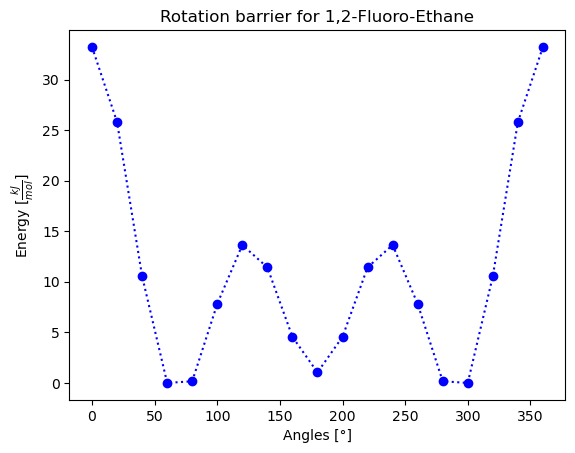

In [127]:
# plot the relative energies vs the angles.
plt.plot(corrected_angles, energies, marker='o', linestyle=':', color='b')

# Add labels and title
plt.xlabel('Angles [°]')
plt.ylabel(r'Energy [$\frac{kJ}{mol}$]')
plt.title('Rotation barrier for 1,2-Fluoro-Ethane')

# Show the plot
plt.show()

How can we interpret this graph? Which structures correspond to which energies and why?

Next, we want to visualize the different conformers. You can use the positions you saved during the conformational screening for this. Create an atoms object for each conformer and visualize it using the view() method from ase.visualize.

In [128]:
conformer = fluoro_ethane.copy()
conformer.set_positions(positions[6])
# view the conformer
view(conformer, viewer="x3d")

To vizualize the structures, there is a function that writes the coordinates of each optimized step into a single xyz file. This file can then be opened by the visualization program of your choice.

In [117]:
# input in function: 
# - filepath: the name of the file to which the trajectory will be written. Be aware: If the file already exists, the new structures will  
#   be appended to the end of the file.
# - positions: a list of arrays of the positions of each step of the scan. This is the list of your for loop of your scan earlier.
# - symbols: a list of the chemical symbols of the atoms in the system. You can get this from the product structure using 
#   "get_chemical_symbols()".

def write_xyz_traj(filepath:str, positions:list, symbols:list):
    num_atoms = len(positions[0])

    # Open file in append mode ('a') to ensure all structures are added sequentially
    with open(filepath, 'a') as f:
        print(f"Writing {len(positions)} structures to {filepath}...")
        
        for pos in positions:
            f.write(f"{num_atoms}\n\n")

            for symbol, (x, y, z) in zip(symbols, pos):
                f.write(f"{symbol}\t{x:10.6f}\t{y:10.6f}\t{z:10.6f}\n")
            
        print("Writing complete.")

In [118]:
write_xyz_traj("rotation_1,2-Fluoro-Ethane.traj", positions, fluoro_ethane.get_chemical_symbols())

Writing 18 structures to rotation_1,2-Fluoro-Ethane.traj...
Writing complete.


Where all calculations necessary? How could we achieve the same results with less calculations?

## Rotation Barrier of 2-Fluoro-Ethanol

In [133]:
from ase.data.pubchem import pubchem_atoms_search

fluoro_ethanol = pubchem_atoms_search("2-Fluoro-Ethanol")
# perform geometry optimization
fluoro_ethanol.calc = ASEMolpro(ansatz='PBE/def2-SVP', density_fitting=True)
with BFGS(fluoro_ethanol, trajectory='fluoro_ethane.traj') as opt:
    opt.run(fmax=0.02)
write("optimized_2-fluoro-ethanol.xyz", fluoro_ethanol)
view(fluoro_ethanol, viewer="x3d")

/home/CompChem3/miniconda3/envs/compchem/lib/python3.11/site-packages/ase/data/pubchem.py:74: UserWarning: The structure "2-Fluoro-Ethanol" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  warnings.warn(


      Step     Time          Energy          fmax
BFGS:    0 16:24:24    -6905.966258        1.418991
BFGS:    1 16:24:36    -6906.027820        0.498575
BFGS:    2 16:24:47    -6906.046128        0.300560
BFGS:    3 16:24:56    -6906.051543        0.154199
BFGS:    4 16:25:06    -6906.053031        0.119245
BFGS:    5 16:25:15    -6906.054947        0.136575
BFGS:    6 16:25:24    -6906.056315        0.130131
BFGS:    7 16:25:33    -6906.057371        0.095115
BFGS:    8 16:25:45    -6906.058280        0.076424
BFGS:    9 16:25:56    -6906.058999        0.092040
BFGS:   10 16:26:07    -6906.059412        0.081443
BFGS:   11 16:26:19    -6906.059703        0.044815
BFGS:   12 16:26:30    -6906.059774        0.035941
BFGS:   13 16:26:41    -6906.059882        0.031751
BFGS:   14 16:26:52    -6906.060094        0.030453
BFGS:   15 16:27:02    -6906.060136        0.021666
BFGS:   16 16:27:15    -6906.060177        0.018185


In [155]:
# Helper to find indices of atoms
fluoro_ethanol = read("optimized_2-fluoro-ethanol.xyz")
pos = fluoro_ethanol.get_positions()
pos[1, :] = 0
fluoro_ethanol.set_positions(pos)
view(fluoro_ethanol, viewer="x3d")

Setting torsion angle to 123.07°
Setting torsion angle to 143.07°
Setting torsion angle to 163.07°
Setting torsion angle to 183.07°
Setting torsion angle to 203.07°
Setting torsion angle to 223.07°
Setting torsion angle to 243.07°
Setting torsion angle to 263.07°
Setting torsion angle to 283.07°
Setting torsion angle to 303.07°
Setting torsion angle to 323.07°
Setting torsion angle to 343.07°
Setting torsion angle to 363.07°
Setting torsion angle to 383.07°
Setting torsion angle to 403.07°
Setting torsion angle to 423.07°
Setting torsion angle to 443.07°
Setting torsion angle to 463.07°
Setting torsion angle to 483.07°


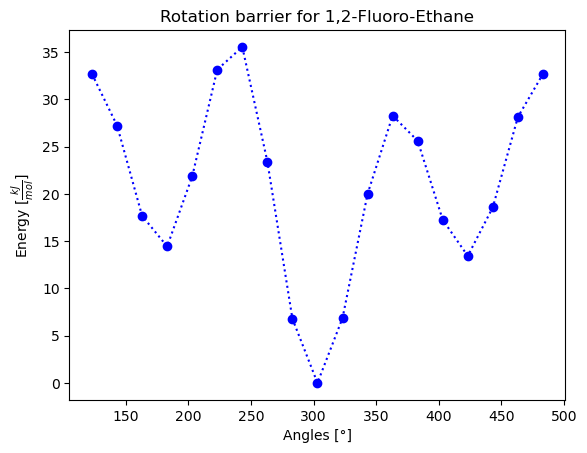

In [156]:
fluoro_ethanol = read("optimized_2-fluoro-ethanol.xyz")

angles = np.arange(-180, 181, 20)
involved_atoms = (0, 6, 7)
energies = np.empty(len(angles))
positions = []
fluoro_ethanol.calc = ASEMolpro(ansatz='PBE/def2-SVP', density_fitting=True)
ini_angles = [fluoro_ethanol.get_dihedral(1, 2, 3, atom) for atom in involved_atoms]

# Rotation
for idx, a in enumerate(angles):
    print(f"Setting torsion angle to {round(ini_angles[2]+a,2)}°")
    for i, atom in enumerate(involved_atoms):
        fluoro_ethanol.set_dihedral(1, 2, 3, atom, ini_angles[i] + a)
    energies[idx] = fluoro_ethanol.get_potential_energy()
    positions.append(fluoro_ethanol.get_positions())
write_xyz_traj("rotation_2-fluoro_ethanol.traj", positions, fluoro_ethanol.get_chemical_symbols())

# Conversion
energies *= mol/kJ
energies -= min(energies)
corrected_angles = [a + ini_angles[2] for a in angles]

# Plotting
plt.plot(corrected_angles, energies, marker='o', linestyle=':', color='b')

plt.xlabel('Angles [°]')
plt.ylabel(r'Energy [$\frac{kJ}{mol}$]')
plt.title('Rotation barrier for 1,2-Fluoro-Ethane')
plt.show()